# <font color=red>Chapter 2. Financial Data Structures</font>

## Exercises

**2.1** On a series of E-mini S&P 500 tick data:

> **a)** Form tick, volume, and dollar bars. Use the ETF trick to deal with the roll.

> **b)** Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

> **c)** Compute the serial correlation of returns for the trhree bar types. What bar method has the lowest serial correlation?

> **d)** Partition the bar series into monthly subsets. Compute the variance of returns for every subset of every bar type. Compute the variance of those variance. What method exhibit the smallest variance of variances?

> **e)** Apply the jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

## a)

### Future Rolling with ETF Trick

Starting rolling 2019 Dax Future data.

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
data = pd.read_excel('FDAX2019.xlsx',parse_dates=['Date'])

In [329]:
data.set_index('Date',inplace=True)

In [330]:
data.head()

,Symbol,Open,High,Low,Settle,Volume,Prev. Day Open Interest
Date,,,,,,,
2018-12-21,FDAXH,10601.5,10650.5,10486.5,10613.5,133103,122074
2018-12-27,FDAXH,10626.0,10701.0,10268.5,10366.5,123093,127084
2018-12-28,FDAXH,10472.0,10611.0,10407.5,10561.5,83059,115953
2019-01-02,FDAXH,10668.0,10707.0,10378.5,10570.0,101639,123971
2019-01-03,FDAXH,10549.5,10555.0,10391.0,10421.0,107458,126789


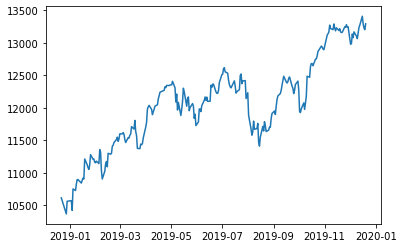

In [331]:
plt.plot(data['Settle'])

 Form a time series of cumulative roll gaps, and detract that gaps series from the price series

In [332]:
def rollGaps(series, matchEnd=True): 
    '''
    matchEnd determine if the future series should be rolled forward (matchEnd=False) or backward (matchEnd=True)
    In a forward roll, the price at the start of the rolled series matches the price at the start of the raw series.
    In a backward roll, the price at the end of the rolled series matches the price at the end of the raw series.
    '''
    # compute gaps at each roll, between previous price and next price
    rollDates = series['Symbol'].drop_duplicates(keep='first').index #indica l'index, la data in cui cambia il contratto
    gaps = series['Settle'] * 0
    iloc = list(series.index)
    iloc = [iloc.index(i)-1 for i in rollDates] # index number of days prior to roll
    gaps.loc[rollDates[1:]] = series['Open'].loc[rollDates[1:]] - series['Settle'].iloc[iloc[1:]].values #prezzo open nuovo contratto - prezzo close del vecchio contratto
    gaps = gaps.cumsum() #somma cumulativa dei 3 ultimi gaps
    if matchEnd: gaps-=gaps.iloc[-1] #sottraiamo ultimo gap
    return gaps
    

In [333]:
gaps = rollGaps(data)

In [334]:
data['Close'] = data['Settle'] - gaps

In [335]:
data

,Symbol,Open,High,Low,Settle,Volume,Prev. Day Open Interest,Close
Date,,,,,,,,
2018-12-21,FDAXH,10601.5,10650.5,10486.5,10613.5,133103,122074,10465.02
2018-12-27,FDAXH,10626.0,10701.0,10268.5,10366.5,123093,127084,10218.02
2018-12-28,FDAXH,10472.0,10611.0,10407.5,10561.5,83059,115953,10413.02
2019-01-02,FDAXH,10668.0,10707.0,10378.5,10570.0,101639,123971,10421.52
2019-01-03,FDAXH,10549.5,10555.0,10391.0,10421.0,107458,126789,10272.52
...,...,...,...,...,...,...,...,...
2019-12-16,FDAXZ,13359.0,13429.5,13321.5,13409.0,98816,108511,13409.00
2019-12-17,FDAXZ,13388.0,13411.0,13268.5,13292.0,136767,112677,13292.00
2019-12-18,FDAXZ,13275.5,13287.0,13205.5,13229.0,111162,75889,13229.00


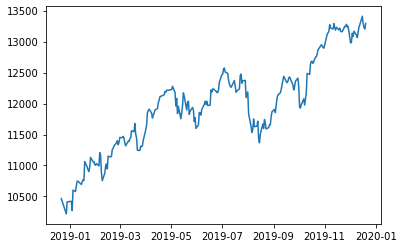

In [336]:
plt.plot(data['Close'])

Alternative method for non-negative rolled prices series

In [337]:
data['Returns'] = data['Close'].diff()/data['Close'].shift(1)
data['rPrices'] = (1 + data['Returns']).cumprod()

In [338]:
data

,Symbol,Open,High,Low,Settle,Volume,Prev. Day Open Interest,Close,Returns,rPrices
Date,,,,,,,,,,
2018-12-21,FDAXH,10601.5,10650.5,10486.5,10613.5,133103,122074,10465.02,NaN,NaN
2018-12-27,FDAXH,10626.0,10701.0,10268.5,10366.5,123093,127084,10218.02,-0.023602,0.976398
2018-12-28,FDAXH,10472.0,10611.0,10407.5,10561.5,83059,115953,10413.02,0.019084,0.995031
2019-01-02,FDAXH,10668.0,10707.0,10378.5,10570.0,101639,123971,10421.52,0.000816,0.995843
2019-01-03,FDAXH,10549.5,10555.0,10391.0,10421.0,107458,126789,10272.52,-0.014297,0.981605
...,...,...,...,...,...,...,...,...,...,...
2019-12-16,FDAXZ,13359.0,13429.5,13321.5,13409.0,98816,108511,13409.00,0.010322,1.281316
2019-12-17,FDAXZ,13388.0,13411.0,13268.5,13292.0,136767,112677,13292.00,-0.008725,1.270136
2019-12-18,FDAXZ,13275.5,13287.0,13205.5,13229.0,111162,75889,13229.00,-0.004740,1.264116


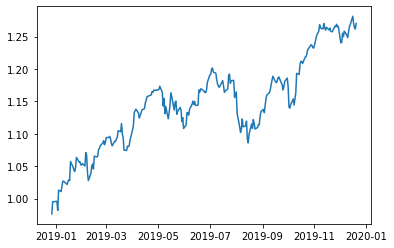

In [339]:
plt.plot(data['rPrices'])

Now form tick, volume and dollar bars. To do so first we have to import tick data

### Time bars

In [340]:
tick_bars_data = pd.read_excel('MFIBtick.xlsx',parse_dates=[['Date','Time']])

In [341]:
tick_bars_data.head(10)

,Date_Time,Open,Close,High,Low,Volume
0,2020-08-21 08:00:40,19860,19860,19860,19860,1
1,2020-08-21 08:00:40,19860,19860,19860,19860,1
2,2020-08-21 08:00:40,19860,19860,19860,19860,1
3,2020-08-21 08:00:40,19860,19860,19860,19860,0
4,2020-08-21 08:00:40,19855,19855,19855,19855,1
5,2020-08-21 08:00:40,19855,19855,19855,19855,1
6,2020-08-21 08:00:40,19850,19850,19850,19850,2
7,2020-08-21 08:00:40,19850,19850,19850,19850,1
8,2020-08-21 08:00:40,19845,19845,19845,19845,1
9,2020-08-21 08:00:44,19835,19835,19835,19835,1


In [342]:
tick_bars_data.set_index('Date_Time',inplace=True)

In [343]:
def resample_hourly(data,frequency='15Min'):
    data.dropna(inplace=True)
    ticks = data.copy()
    open_ = ticks.Open.resample(frequency).first()
    close = ticks.Close.resample(frequency).last()
    high = ticks.High.resample(frequency).max()
    low = ticks.Low.resample(frequency).min()
    volume = ticks.Volume.resample(frequency).sum()
    data_resampled = pd.concat([open_,close,high,low,volume],axis=1)
    data_resampled.dropna(inplace=True)
    return data_resampled

# modificare per includere tutte le possibilità di resample es. daily 'D', minutes '15M'

In [344]:
hourly_data = resample_hourly(tick_bars_data)

In [345]:
hourly_data

,Open,Close,High,Low,Volume
Date_Time,,,,,
2020-08-21 08:00:00,19860.0,19815.0,19860.0,19800.0,58
2020-08-21 08:15:00,19815.0,19795.0,19815.0,19795.0,34
2020-08-21 08:30:00,19790.0,19815.0,19825.0,19785.0,46
2020-08-21 08:45:00,19815.0,19840.0,19845.0,19800.0,90
2020-08-21 09:00:00,19835.0,19775.0,19855.0,19760.0,444
...,...,...,...,...,...
2020-11-03 21:00:00,18955.0,18960.0,18965.0,18930.0,115
2020-11-03 21:15:00,18960.0,18985.0,18990.0,18950.0,62
2020-11-03 21:30:00,18995.0,19055.0,19100.0,18995.0,435


### Tick Bars

In [346]:
# per raggruppare in 100 tick usiamo // che ci dice quante volte un numero rientra in una divisione
# es se scegliamo 100 da 0 a 99 ci darà 0 da 100 a 199 ci dà 1; quindi ragruppa tutti gli 0 gli 1...
def resample_ticks(data,n_ticks=126):
    ticks = data.copy()
    ticks.dropna(inplace=True)
    ticks['DataTime'] = ticks.index
    ticks = ticks.reset_index()
    index = ticks.DataTime.groupby(ticks.index // n_ticks).last()
    open_ = ticks.Open.groupby(ticks.index // n_ticks).first()
    close = ticks.Close.groupby(ticks.index // n_ticks).last()
    high = ticks.High.groupby(ticks.index // n_ticks).max()
    low = ticks.Low.groupby(ticks.index // n_ticks).min()
    volume = ticks.Volume.groupby(ticks.index // n_ticks).sum()
    data_resampled = pd.concat([index,open_,close,high,low,volume],axis=1)
    data_resampled.set_index(index,inplace=True)
    data_resampled.dropna(inplace=True)
    return data_resampled

In [347]:
num_time_bars = len(hourly_data)
num_time_bars

3021

In [348]:
total_ticks = len(tick_bars_data)
num_ticks_per_bar = total_ticks / num_time_bars
num_ticks_per_bar

126.87719298245614

In [349]:
ticks_data = resample_ticks(tick_bars_data)

In [350]:
ticks_data

,DataTime,Open,Close,High,Low,Volume
DataTime,,,,,,
2020-08-21 08:44:03,2020-08-21 08:44:03,19860,19815,19860,19785,138
2020-08-21 09:01:05,2020-08-21 09:01:05,19815,19840,19845,19795,156
2020-08-21 09:05:38,2020-08-21 09:05:38,19840,19845,19850,19810,147
2020-08-21 09:11:01,2020-08-21 09:11:01,19845,19775,19855,19775,135
2020-08-21 09:15:16,2020-08-21 09:15:16,19780,19745,19800,19745,177
...,...,...,...,...,...,...
2020-11-03 21:33:32,2020-11-03 21:33:32,18970,19025,19025,18950,160
2020-11-03 21:36:09,2020-11-03 21:36:09,19025,19055,19080,19025,174
2020-11-03 21:46:29,2020-11-03 21:46:29,19045,19065,19100,19045,167


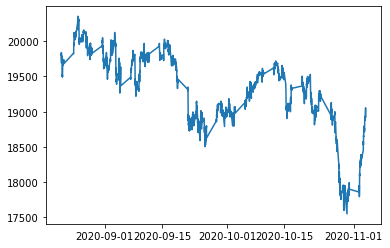

In [351]:
plt.plot(hourly_data.Close)

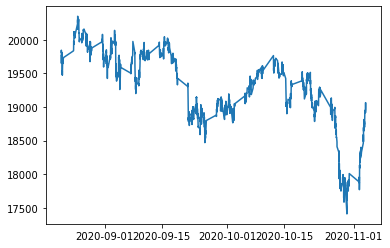

In [352]:
plt.plot(ticks_data.Close)

### Volume Bars

In [353]:
data_vol = tick_bars_data.assign(cmVol=tick_bars_data['Volume'].cumsum()) 
total_vol = data_vol.cmVol.values[-1]
vol_per_bar = total_vol / num_time_bars
#vol_per_bar = round(vol_per_bar, -2) # round to the nearest hundred
vol_per_bar

147.6772591857001

In [354]:
def resample_volume(data,n_volume=147):
    volume_data = data.copy()
    volume_data.dropna(inplace=True)
    volume_data['DataTime'] = volume_data.index
    volume_data['Volumecum'] = volume_data['Volume'].cumsum()
    volume_data = volume_data.reset_index()
    volume_data.set_index('Volumecum',inplace=True)
    index = volume_data.DataTime.groupby(volume_data.index // n_volume).last()
    open_ = volume_data.Open.groupby(volume_data.index // n_volume).first()
    close = volume_data.Close.groupby(volume_data.index // n_volume).last()
    high = volume_data.High.groupby(volume_data.index // n_volume).max()
    low = volume_data.Low.groupby(volume_data.index // n_volume).min()
    volume = volume_data.Volume.groupby(volume_data.index // n_volume).sum()
    data_resampled = pd.concat([index,open_,close,high,low,volume],axis=1)
    data_resampled.set_index(index,inplace=True)
    data_resampled.dropna(inplace=True)
    return data_resampled

In [355]:
volume_bars = resample_volume(tick_bars_data)

In [356]:
volume_bars

,DataTime,Open,Close,High,Low,Volume
DataTime,,,,,,
2020-08-21 08:46:06,2020-08-21 08:46:06,19860,19800,19860,19785,146
2020-08-21 09:01:05,2020-08-21 09:01:05,19800,19840,19845,19795,147
2020-08-21 09:05:37,2020-08-21 09:05:37,19840,19840,19850,19810,147
2020-08-21 09:11:12,2020-08-21 09:11:12,19845,19765,19855,19765,147
2020-08-21 09:15:15,2020-08-21 09:15:15,19760,19755,19800,19755,144
...,...,...,...,...,...,...
2020-11-03 21:31:38,2020-11-03 21:31:38,18945,19015,19020,18945,147
2020-11-03 21:34:22,2020-11-03 21:34:22,19020,19075,19075,19010,147
2020-11-03 21:38:49,2020-11-03 21:38:49,19080,19065,19080,19040,147


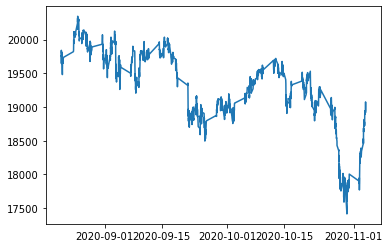

In [357]:
plt.plot(volume_bars.Close)

### Dollar Bars

In [358]:
data_dol = tick_bars_data.assign(cmDol=(tick_bars_data['Volume']*tick_bars_data['Close']).cumsum()) 
total_dol = data_dol.cmDol.values[-1]
dol_per_bar = total_dol / num_time_bars
#vol_per_bar = round(vol_per_bar, -2) # round to the nearest hundred
dol_per_bar

2832597.370076134

In [359]:
def resample_dollar(data,dollar_value=2832597):
    dollar_data = data.copy()
    dollar_data.dropna(inplace=True)
    dollar_data['DataTime'] = dollar_data.index
    dollar_data['Dollarcum'] = (dollar_data['Volume']*dollar_data['Close']).cumsum()
    dollar_data = dollar_data.reset_index()
    dollar_data.set_index('Dollarcum',inplace=True)
    index = dollar_data.DataTime.groupby(dollar_data.index // dollar_value).last()
    open_ = dollar_data.Open.groupby(dollar_data.index // dollar_value).first()
    close = dollar_data.Close.groupby(dollar_data.index // dollar_value).last()
    high = dollar_data.High.groupby(dollar_data.index // dollar_value).max()
    low = dollar_data.Low.groupby(dollar_data.index // dollar_value).min()
    volume = dollar_data.Volume.groupby(dollar_data.index // dollar_value).sum()
    data_resampled = pd.concat([index,open_,close,high,low,volume],axis=1)
    data_resampled.set_index(index,inplace=True)
    data_resampled.dropna(inplace=True)
    
    return data_resampled

In [360]:
dollar_bars = resample_dollar(tick_bars_data)

In [361]:
dollar_bars

,DataTime,Open,Close,High,Low,Volume
DataTime,,,,,,
2020-08-21 08:45:42,2020-08-21 08:45:42,19860,19810,19860,19785,142
2020-08-21 09:01:02,2020-08-21 09:01:02,19810,19840,19845,19795,143
2020-08-21 09:05:19,2020-08-21 09:05:19,19840,19830,19850,19810,141
2020-08-21 09:10:51,2020-08-21 09:10:51,19835,19775,19855,19775,145
2020-08-21 09:15:15,2020-08-21 09:15:15,19775,19765,19800,19760,141
...,...,...,...,...,...,...
2020-11-03 21:34:22,2020-11-03 21:34:22,19020,19065,19065,19000,149
2020-11-03 21:37:44,2020-11-03 21:37:44,19070,19060,19080,19040,147
2020-11-03 21:48:59,2020-11-03 21:48:59,19060,19075,19100,19050,149


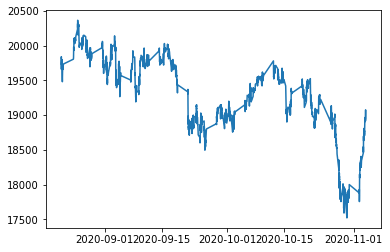

In [362]:
plt.plot(dollar_bars.Close)

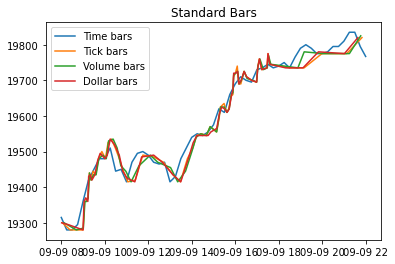

In [363]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(hourly_data['Low']['2020-09-09'], label='Time bars')  # Plot some data on the axes.
ax.plot(ticks_data['Low']['2020-09-09'], label='Tick bars')  # Plot more data on the axes...
ax.plot(volume_bars['Low']['2020-09-09'], label='Volume bars')  # ... and some more.
ax.plot(dollar_bars['Low']['2020-09-09'], label='Dollar bars')
ax.set_title("Standard Bars")  # Add a title to the axes.
ax.legend()  # Add a legend.

## b)

In [364]:
time_weekly = hourly_data['Close'].resample('1W').count()
tick_weekly = ticks_data['Close'].resample('1W').count()
volume_weekly = volume_bars['Close'].resample('1W').count()
dollar_weekly = dollar_bars['Close'].resample('1W').count()

In [365]:
count_df = pd.concat([time_weekly, tick_weekly, volume_weekly, dollar_weekly], axis=1)
count_df.columns = ['time', 'tick', 'volume', 'dollar']

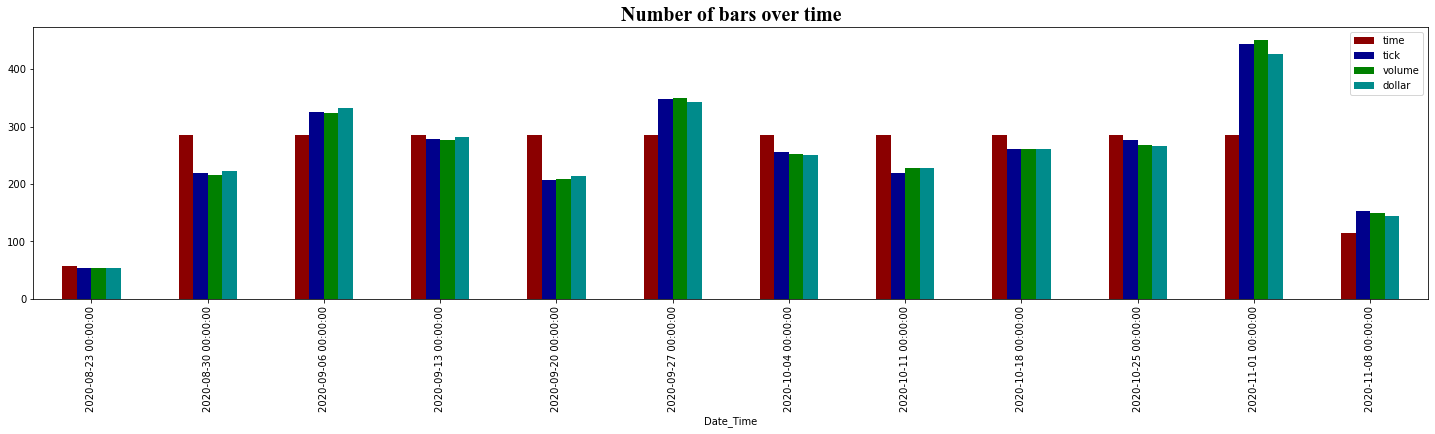

In [366]:
count_df.loc[:, ['time', 'tick', 'volume', 'dollar']].plot(kind='bar', figsize=[25, 5], color=('darkred', 'darkblue', 'green', 'darkcyan'))
plt.title('Number of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

In [367]:
print('Time bars std:',time_weekly[1:11].std())
print('Tick bars std:',tick_weekly[1:11].std())
print('Volume bars std:',volume_weekly[1:11].std())
print('Dollar bars std:',dollar_weekly[1:11].std())

Time bars std: 0.0
Tick bars std: 72.43725254008159
Volume bars std: 73.90241313155252
Dollar bars std: 66.28758891711513


The bar type that produces the most stable weekly bars is the **Dollar bars**

## c)

**Autocorrelation** of a time series of returns from an investment refers to the possible correlation of returns with one another through time. For example, first order autocorrelation refers to the correlation between the return in time period *t* and the return in the previous time period *(t-1)*.

Positive first-order autocorrelation is when an above-average (below-average) return in time *t-1* tend to be followed by an above-average (below-average) return in time *t*. Conversely, neative first order autocorrelation is when an above-average (below-average) return in time *t-1* tend to be followed by an below-average (above-average) return in time period *t*. 

- Zero autocorrelation indicates that returns are linearly independent through time. 
- Positive autocorrelation is seen in trending markets
- Negative autocorrelation is seen in markets with price reversal tendencies

If autocorrelation is zero and return distribution is stationary (the probability distribution of returns at each point in time is identical), the distribution of log returns over longer periods of time will tend toward being a normal distribution, even if the very short-term log returns are not normally distributed. (this for the central limit theorem)

Autocorrelation in returns has implications for the relationship between the standard deviations of return series computed over different time lengths:

- If autocorrelation is positive (returns are trending), the standard deviation of returns over T periods will be larger than the single-period standard deviation multiplied by the square root of T.
- If autocorrelation is zero,the standard deviation of returns over T periods will be equal to the single-period standard deviation multiplied by the square root of T.
- Finally, if autocorrelation is negative (returns are mean-reverting), the standard deviation of returns over T periods will be less than the single-period standard deviation multiplied by the square root of T.


In [368]:
log_ret_time = np.log(hourly_data['Close']) -np.log(hourly_data['Close'].shift(1))
log_ret_time.dropna(inplace=True)
log_ret_tick = np.log(ticks_data['Close']) -np.log(ticks_data['Close'].shift(1))
log_ret_tick.dropna(inplace=True)
log_ret_volume = np.log(volume_bars['Close']) -np.log(volume_bars['Close'].shift(1))
log_ret_volume.dropna(inplace=True)
log_ret_dollar = np.log(dollar_bars['Close']) -np.log(dollar_bars['Close'].shift(1))
log_ret_dollar.dropna(inplace=True)

In [369]:
print('time bars autocorrelation:',log_ret_time.autocorr())
print('tick bars autocorrelation:',log_ret_tick.autocorr())
print('volume bars autocorrelation:',log_ret_volume.autocorr())
print('dollar bars autocorrelation:',log_ret_dollar.autocorr())

time bars autocorrelation: -0.11087097058297671
tick bars autocorrelation: -0.019229249170308316
volume bars autocorrelation: -0.022360578781869346
dollar bars autocorrelation: -0.034722326077739195


In [370]:
import statsmodels.api as sm

The **Durbin whatson** test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

In [371]:
#sm.stats.stattools.durbin_watson
print('durbin watson time bars:',sm.stats.stattools.durbin_watson(log_ret_time))
print('durbin watson tick bars:',sm.stats.stattools.durbin_watson(log_ret_tick))
print('durbin watson volume bars:',sm.stats.stattools.durbin_watson(log_ret_volume))
print('durbin watson dollar bars:',sm.stats.stattools.durbin_watson(log_ret_dollar))

durbin watson time bars: 2.2188175638299104
durbin watson tick bars: 2.0368824605549274
durbin watson volume bars: 2.039123776673443
durbin watson dollar bars: 2.0679532119737454


## d)

In [372]:
std_time_ret=log_ret_time.resample('1M').std()
std_tick_ret=log_ret_tick.resample('1M').std()
std_volume_ret=log_ret_volume.resample('1M').std()
std_dollar_ret=log_ret_dollar.resample('1M').std()

In [373]:
monthly_std = pd.concat([std_time_ret, std_tick_ret, std_volume_ret, std_dollar_ret], axis=1)
monthly_std.columns = ['time', 'tick', 'volume', 'dollar']

In [374]:
monthly_std

,time,tick,volume,dollar
Date_Time,,,,
2020-08-31,0.001686,0.001688,0.001748,0.001726
2020-09-30,0.002132,0.001855,0.001865,0.001850
2020-10-31,0.002060,0.001975,0.001986,0.001988
2020-11-30,0.002162,0.001962,0.001830,0.001900


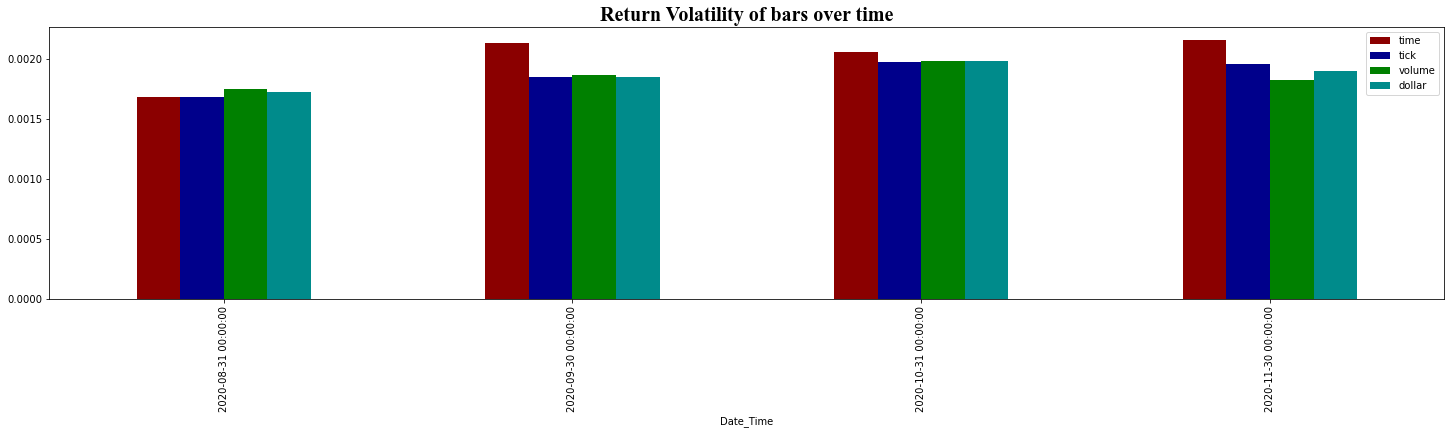

In [375]:
monthly_std.loc[:, ['time', 'tick', 'volume', 'dollar']].plot(kind='bar', figsize=[25, 5], color=('darkred', 'darkblue', 'green', 'darkcyan'))
plt.title('Return Volatility of bars over time', loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.show()

In [376]:
# compute the standard deviation of standard deviation

monthly_std.std()

time      0.000220
tick      0.000133
volume    0.000099
dollar    0.000109
dtype: float64

**Volume and dollar bars returns have the least amount of variance of variance**

The **Jarque-Bera test** tests whether the sample data has the skewness and kurtosis matching a normal distribution.

Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.

In [377]:
import scipy.stats as stats
print('Jarque-Bera test time bars:',stats.jarque_bera(log_ret_time))
print('Jarque-Bera test tick bars:',stats.jarque_bera(log_ret_tick))
print('Jarque-Bera test volume bars:',stats.jarque_bera(log_ret_volume))
print('Jarque-Bera test dollar bars:',stats.jarque_bera(log_ret_dollar))

Jarque-Bera test time bars: (9534.581177005775, 0.0)
Jarque-Bera test tick bars: (15887.69205467513, 0.0)
Jarque-Bera test volume bars: (12982.194405655355, 0.0)
Jarque-Bera test dollar bars: (4448.292591115382, 0.0)


**Since this p-value is less than .05, we reject the null hypothesis. Thus, we have sufficient evidence to say that this data has skewness and kurtosis that is significantly different from a normal distribution.**

Dollar bars has smaller Jarque-Bera test

In [378]:
# Standardize the data
time_standard = (log_ret_time - log_ret_time.mean()) / log_ret_time.std()
tick_standard = (log_ret_tick - log_ret_tick.mean()) / log_ret_tick.std()
volume_standard = (log_ret_volume - log_ret_volume.mean()) / log_ret_volume.std()
dollar_standard = (log_ret_dollar - log_ret_dollar.mean()) / log_ret_dollar.std()

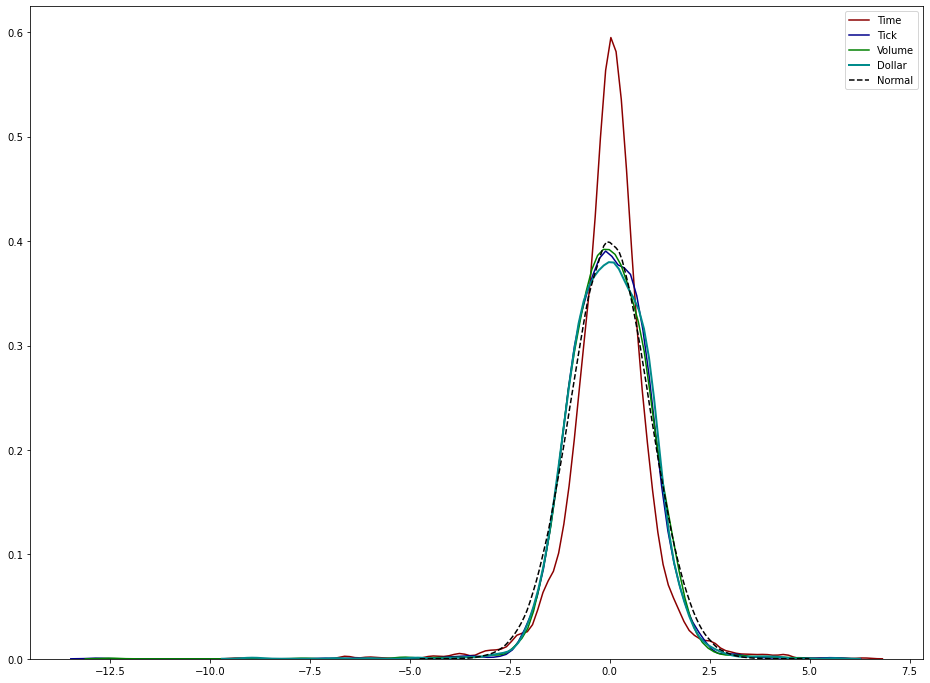

In [379]:
# Plot the Distributions
plt.figure(figsize=(16,12))
sns.kdeplot(time_standard, label="Time", color='darkred')
sns.kdeplot(tick_standard, label="Tick", color='darkblue')
sns.kdeplot(volume_standard, label="Volume", color='green')
sns.kdeplot(dollar_standard, label="Dollar", linewidth=2, color='darkcyan')
sns.kdeplot(np.random.normal(size=1000000), label="Normal", color='black', linestyle="--")

**2.2** On a series of tick data, compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation? Why?

### Tick Imbalance bars

To build this kind of bars we assume that tick imbalance represents informed trading. So, whenever we observe an unexpected amount of imbalance we sample market prices and create a new bar.

*The purpose of information-driven bars is to sample more frequently when new information arrives to the market. In this context, the word “information” is used in a market microstructural sense. […] By synchronizing sampling with the arrival of informed traders, we may be able to make decisions before prices reach a new equilibrium level.*

Consider a sequence of ticks {(p_t, v_t)} for t=1, …, T, where p_t and v_t represent price and volume at time t. The tick-rule defines a sequence of tick signs {b_t} for t=1, …, T where b_t can either be 1 or -1.

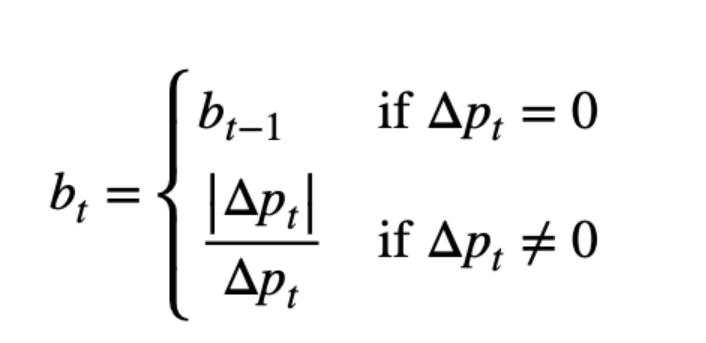

Next, the tick imbalance can be defined as a partial sum of tick signs over T ticks.

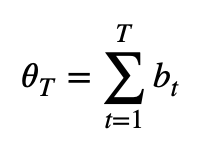

Now, we should sample bars whenever tick imbalances exceed our expectations. This means we must compute a running imbalance for each bar and compare it with our expectation. We will close the bar when the absolute value of the current imbalance is greater than the absolute expected imbalance.

The expected imbalance at the beginning of each bar can be calculated as the product between the expected number of ticks per bar (T) and the unconditional expectation of the tick sign (b_t). We can estimate these moments using exponentially weighted moving averages (EWMAs).

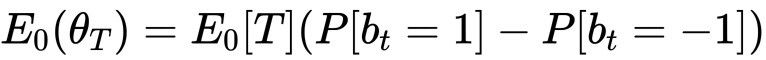

In particular:
- we can estimate the expected number of ticks per bar using an EWMA of the actual number of ticks T of previous bars
- we can estimate the unconditional expectation of the tick sign using an EWMA of the tick signs of the previous ticks

First of all, the proposed bar generating mechanism is heavily affected by how you initialize its parameters — to produce imbalance bars you must initialize the expected number of ticks per bar (init_T below), the unconditional expectation of the tick sign (E[b_t]) and the alphas that define the two exponential averages used to update our expectations.

The following plot represents results obtained with more than a thousand simulations. It shows that the number of bars produced for the same time interval decreases as the alpha that defines EWMA(T) increases. In addition, the number of bars decreases when we increase the value of T used to initialize the mechanism.

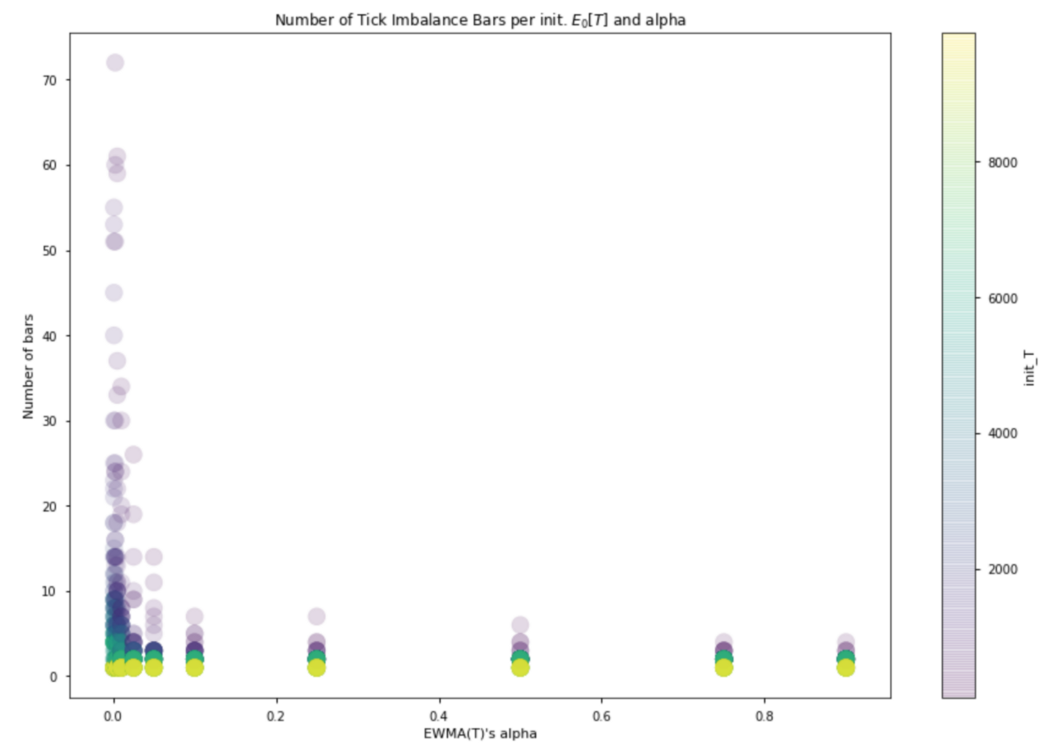

*Scatter Plot of the number of generated bars in each simulation VS initialization parameters. The x axis represents the alpha used to update the expected number of ticks. init_T is the value we use to initialize EWMA(T). The EWMA(b_t)’s alpha has been kept constant at 0.005. The unconditional expectation of the tick sign is always initialized with 0.5. Example: If you initialize the mechanism using an EWMA(T)’s alpha slightly greater than 0.2 and an init_T near 2000 you get less than 10 bars for a month of data.*

Naturally enough, the higher is the number of resulting bars, the lower is the amount of information we incorporate in each bar.

This means that when we choose how to initialize the bar generating mechanism we are roughly choosing the imbalance threshold we will use to close our bars.

It’s important to acknowledge that if the initialized expected imbalance is too high the mechanism will produce only a few bars or will even have a hard time generating a single bar; if it is too low we will instead produce too many bars. Our mechanism does not automatically adjust when your choice of initial parameters is completely wrong.
 
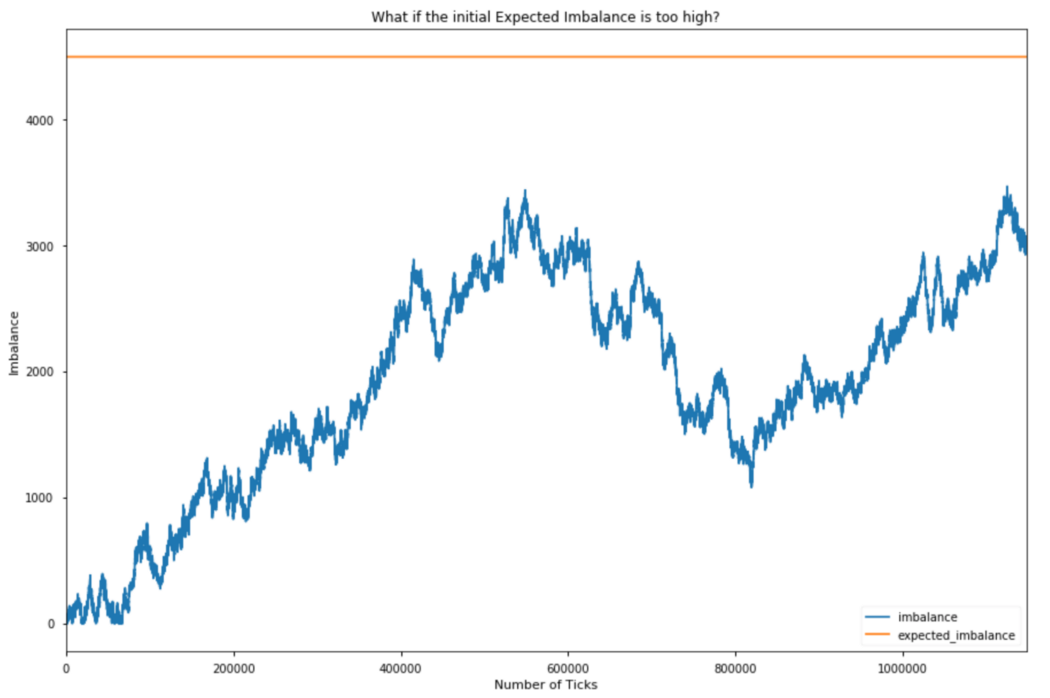

Secondly, although I like the idea that our expectations are dynamic, I do not really understand the suggested implementation. If we sample the market following AFML, we get heterogeneous bars: each bar has a different information content. And this may be great but the point is that the amount of information we enclose in each bar and its dynamics are almost out of our control.

The absolute value of the unconditional expectation of b_t can assume values in [0, 1] so what really defines the expected imbalance is the expected number of ticks. This means that the expected imbalance of the next bar could be higher (lower) if it took more (less) ticks to form the last bars. But how can you justify this idea? Why should your imbalance expectations increase if it just took a lot of ticks to reach the imbalance level you were expecting before closing the last bar?

**The threshold at which you close a bar should be determined by other things.** Ideally, I would like to close a bar when the current imbalance reaches a significant threshold, a threshold that tells me that prices will be somehow affected in the next X volume bars for example. Whether this significant threshold should be constant or not is a matter of research.

**“the objective of imbalance bars is to early detect a shift in the directionality of the market before a new equilibrium is reached”.** With this objective in mind, I will keep studying to understand how to improve my understanding of the concept. In particular, I would like to understand if significant thresholds exist and whether or not they can be specified dynamically.



### Information - Driven Bars

- The purpose of information-driven bars is to sample more frequently when new information arrives to the market.
- By synchronizing sampling with the arrival of informed traders, we may be able to make decisions before prices reach a new equilibrium level.We can focus on large moves and ignore less interesting periods.


### Dollar imbalance bar

#### Step 1) Tick Rule

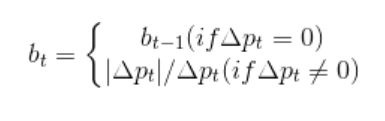

In [380]:
import math
def bt(p0, p1,bs): #bs has to be a list or array
    if math.isclose((p1-p0),0.0,abs_tol = 0.001):
        b = bs[-1]
        return b
    else:
        b = np.abs(p1-p0)/(p1-p0)
        return b

### step 2)

compute the imbalance at time T defined as

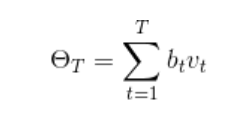

pt : price

vt : the number of securities traded(VIB) || the dollar amount exchanged (DIB)

In [381]:
from tqdm import tqdm_notebook
'''
tqdm:

When dealing with large datasets, even the simplest operations can take hours. 
Progress bars can help make data processing jobs less of a headache because:
- You get a reliable estimate of how long it will take.
- You can see immediately if it’s gotten stuck.
'''

def get_imbalance(t): # θt (imbalance at time t )
    bs = np.zeros_like(t) #return an array of zeros with the same shape and type as a given array.
    for i in tqdm_notebook(np.arange(2,bs.shape[0])):#Restituisce una matrice, non un elenco
        t_bt = bt(t[i-1],t[i],bs[:i-1])
        bs[i-1] = t_bt
    return bs[:-1] #remove last value

In [382]:
df_ticks = tick_bars_data
df_ticks.replace(0,np.nan,inplace=True)#eliminiamo i volumi = 0 che se moltiplicati per bt ci danno 0
df_ticks.dropna(inplace=True)
dol_imb = get_imbalance(tick_bars_data.Close.values)*tick_bars_data.Volume.iloc[1:]*tick_bars_data.Close.iloc[1:]

C:\Users\Gabriele\anaconda3\lib\site-packages\ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


In [383]:
dol_imb.head()

Date_Time
2020-08-21 08:00:40        0.0
2020-08-21 08:00:40        0.0
2020-08-21 08:00:40   -19855.0
2020-08-21 08:00:40   -19855.0
2020-08-21 08:00:40   -39700.0
dtype: float64

In [384]:
cum_theta= dol_imb.cumsum()

In [385]:
cum_theta

Date_Time
2020-08-21 08:00:40           0.0
2020-08-21 08:00:40           0.0
2020-08-21 08:00:40      -19855.0
2020-08-21 08:00:40      -39710.0
2020-08-21 08:00:40      -79410.0
                          ...    
2020-11-03 21:59:46   -26761315.0
2020-11-03 21:59:50   -26742320.0
2020-11-03 21:59:51   -26723325.0
2020-11-03 21:59:51   -26799285.0
2020-11-03 21:59:57   -26704135.0
Length: 383086, dtype: float64

### step 3)

compute the expected value of T (Tick index) ewma of previous T values.

In [386]:
wndo=dol_imb.shape[0]//1000

E_bs = dol_imb.ewm(wndo).mean()

In [387]:
E_bs

Date_Time
2020-08-21 08:00:40        0.000000
2020-08-21 08:00:40        0.000000
2020-08-21 08:00:40    -6635.598538
2020-08-21 08:00:40    -9953.386527
2020-08-21 08:00:40   -15933.776075
                           ...     
2020-11-03 21:59:46     3233.945679
2020-11-03 21:59:50     3274.990092
2020-11-03 21:59:51     3315.927617
2020-11-03 21:59:51     3109.479889
2020-11-03 21:59:57     3349.168744
Length: 383086, dtype: float64

### step 4)

compute the expected value of θT(which is E0[ θT]) as ewma of btvt values.

In [388]:
E_T = pd.Series(range(dol_imb.shape[0])).ewm(wndo).mean()

In [389]:
E_T = pd.DataFrame(E_T.values)

In [390]:
E_T.set_index(E_bs.index,inplace=True)

### step 5)

for each index:

compute |θT| = E0[T] * |2v+ - E0[vt]|

if the condition is met capture the quantitiy of ticks

-reset tick count

-continue

In [391]:
dol_imb_result = pd.DataFrame().assign(bs = dol_imb).assign(E_T = E_T).assign(E_bs = E_bs).assign(absMul = lambda data: data.E_T*np.abs(data.E_bs)).assign(absTheta = dol_imb.cumsum().abs())

In [392]:
dol_imb_result

,bs,E_T,E_bs,absMul,absTheta
Date_Time,,,,,
2020-08-21 08:00:40,0.0,0.000000,0.000000,0.000000e+00,0.0
2020-08-21 08:00:40,0.0,0.500652,0.000000,0.000000e+00,0.0
2020-08-21 08:00:40,-19855.0,1.001738,-6635.598538,6.647134e+03,19855.0
2020-08-21 08:00:40,-19855.0,1.503259,-9953.386527,1.496252e+04,39710.0
2020-08-21 08:00:40,-39700.0,2.005215,-15933.776075,3.195065e+04,79410.0
...,...,...,...,...,...
2020-11-03 21:59:46,-18990.0,382698.000000,3233.945679,1.237625e+09,26761315.0
2020-11-03 21:59:50,18995.0,382699.000000,3274.990092,1.253335e+09,26742320.0
2020-11-03 21:59:51,18995.0,382700.000000,3315.927617,1.269005e+09,26723325.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBA637DBC8>,
      dtype=object)

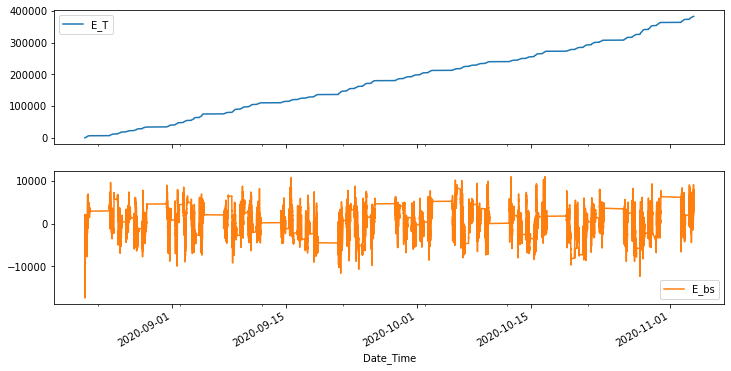

In [393]:
dol_imb_result[['E_T','E_bs']].plot(subplots = True,figsize = (12,6))

In [394]:
dol_imb_result.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 383086 entries, 2020-08-21 08:00:40 to 2020-11-03 21:59:57
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   bs        383086 non-null  float64
 1   E_T       383086 non-null  float64
 2   E_bs      383086 non-null  float64
 3   absMul    383086 non-null  float64
 4   absTheta  383086 non-null  float64
dtypes: float64(5)
memory usage: 17.5 MB


In [395]:
display(dol_imb_result.describe()/1000)

,bs,E_T,E_bs,absMul,absTheta
count,383.086000,383.086000,383.086000,3.830860e+02,383.086000
mean,-0.069708,191.160131,-0.076348,5.209331e+05,36932.458782
std,26.551195,110.586458,3.374010,5.298417e+05,22295.842212
min,-847.575000,0.000000,-17.409421,0.000000e+00,0.000000
25%,-19.360000,95.388250,-2.459539,1.235520e+05,20614.902500
50%,-17.650000,191.159500,-0.078773,3.414923e+05,36212.240000
75%,19.360000,286.930750,2.346784,7.606629e+05,49894.950000
max,772.235000,382.702000,10.978016,4.029539e+06,92939.295000


we define VIB of DIB as a T*- contiguous subset of ticks such that the following condition is met:



In [396]:
def test_t_abs(absTheta,t,E_bs):
    """
    Bool function to test inequality
    *row is assumed to come from df.itertuples()
    -absTheta: float(), row.absTheta
    -t: pd.Timestamp()
    -E_bs: float(), row.E_bs
    """
    return (absTheta >= t*E_bs)

In [397]:
def agg_imbalance_bars(df):
    """
    Implements the accumulation logic
    """
    start = df.index[0]  
    bars = []
    for row in tqdm_notebook(df.itertuples()):
      #  print(row)
        t_abs = row.absTheta
        rowIdx = row.Index
        E_bs = row.E_bs
        
        t = df.loc[start:rowIdx].shape[0]
        if t<1: t=1 # if t lt 1 set equal to 1
        if test_t_abs(t_abs,t,E_bs):
            bars.append((start,rowIdx,t))
            start = rowIdx
    return bars

In [398]:
dol_imb_result.itertuples()

In [399]:
#absTheta = dol_imb.cumsum().abs()
bars = agg_imbalance_bars(dol_imb_result)

C:\Users\Gabriele\anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [400]:
test_imb_bars = (pd.DataFrame(bars,columns=['start','stop','Ts']).drop_duplicates())

In [401]:
test_imb_bars

,start,stop,Ts
0,2020-08-21 08:00:40,2020-08-21 08:00:40,7
7,2020-08-21 08:00:40,2020-08-21 08:00:44,8
8,2020-08-21 08:00:44,2020-08-21 08:00:45,2
9,2020-08-21 08:00:45,2020-08-21 08:00:46,3
10,2020-08-21 08:00:46,2020-08-21 08:00:46,2
...,...,...,...
383065,2020-11-03 21:59:46,2020-11-03 21:59:46,2
383066,2020-11-03 21:59:46,2020-11-03 21:59:50,3
383067,2020-11-03 21:59:50,2020-11-03 21:59:51,3
383068,2020-11-03 21:59:51,2020-11-03 21:59:51,2


In [402]:
dollar_imbalance_bars = tick_bars_data.Close.loc[test_imb_bars.stop].drop_duplicates()

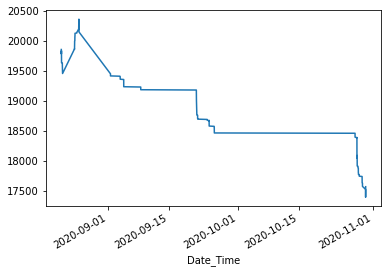

In [403]:
dollar_imbalance_bars.plot()

In [404]:
dollar_imbalance_bars

Date_Time
2020-08-21 08:00:40    19860
2020-08-21 08:00:40    19855
2020-08-21 08:00:40    19850
2020-08-21 08:00:40    19845
2020-08-21 08:00:44    19835
                       ...  
2020-10-30 08:02:48    17490
2020-10-30 08:02:48    17485
2020-10-30 08:11:37    17565
2020-10-30 08:11:48    17570
2020-10-30 08:12:35    17575
Name: Close, Length: 593, dtype: int64

In [405]:
# Autocorrelation

log_ret_imb_dollar = np.log(dollar_imbalance_bars) -np.log(dollar_imbalance_bars.shift(1))
log_ret_imb_dollar.dropna(inplace=True)

In [406]:
print('Dollar Bar autocorrelation:', log_ret_dollar.autocorr())
print('Dollar Imbalance Bar autocorrelation:', log_ret_imb_dollar.autocorr())

Dollar Bar autocorrelation: -0.034722326077739195
Dollar Imbalance Bar autocorrelation: -0.007368243366170448


# Imports
import itertools
import numpy as np

# Spaghetti function to create imbalance bar ids
def create_imbalance_bar_id(tick_imbalances, in_T, in_b, alpha, arrays=False):
    """
    :parameter: tick_imbalances: list of tick signs - either a +1 or a -1
    :parameter: in_T: initialization value for the expected number of ticks
    :parameter: in_b: initialization value for the expected imbalance
    :parameter: alpha: alpha to update the EWMA(T)
    :return: lists or numpy arrays if arrays=True
    """
    
    # Initialize expected imbalance
    expected_imbalance = in_T * in_b
    
    # Set a fixed value for ewma_bt
    ewma_bt = .005
    
    # Initialize ewmas
    ewma_T = in_T
    ewma_imbalance = in_b
    
    # Initialize tick count and current imbalance
    T = 0
    current_imbalance = 0
    bar_id = 1
    
    # Create lists to keep track of absolute current imbalances, expected imbalances per tick and bar ids
    abs_imbalances, expected_imbalances, bar_ids = [], [], []
    T_ewmas, imbalance_ewmas = [], []
    
    # Spaghetti loop
    for imbalance in tick_imbalances:
        
        T += 1
        current_imbalance += imbalance
        ewma_imbalance = ewma_bt * imbalance + (1 - ewma_bt) * ewma_imbalance
        
        # Save current imbalance ewma
        imbalance_ewmas.append(ewma_imbalance)
        
        bar_ids.append(bar_id)
        abs_imbalances.append(abs(current_imbalance))
        expected_imbalances.append(expected_imbalance)
        
        # Save current T ewma
        T_ewmas.append(ewma_T)
        
        if abs(current_imbalance) >= expected_imbalance:
            ewma_T = alpha * T + (1 - alpha) * ewma_T
        
            
            expected_imbalance = ewma_T * abs(ewma_imbalance)
            current_imbalance = 0
            T = 0
            bar_id += 1
    
    if arrays:
        return np.asarray(bar_ids), \
    np.asarray(abs_imbalances), \
    np.asarray(expected_imbalances), \
    np.asarray(imbalance_ewmas), \
    np.asarray(T_ewmas)
    
    # Otherwise return lists
    return bar_ids, abs_imbalances, expected_imbalances, imbalance_ewmas, T_ewmas

# Parameters to initialize 
alphas = [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
init_T = list(range(100, 10000, 100))
init_b_t = [.5]

# Cartesian product of our lists of parameters
parameters = list(itertools.product(alphas, init_T, init_b_t))


"""
List of tick signs or even signed volumes if you like.
Something like [1, -1, 1, 1, 1, -1, ..., 1] -> I assume you are able to get some tick data and compute the tick sign
according to the well known tick rule.
"""
b_list = # Your list


# Dic with results
data = {"alpha": [],
       "init_T": [],
       "init_bt": [],
       "n_bars": [],
       "exp_imbalance_var": [],
        "min_exp_imbalance": [],
        "max_exp_imbalance": [],
        "median_exp_imbalance": [],
        "min_num_ticks_per_bar": [],
        "max_num_ticks_per_bar": [],
        "median_num_ticks_per_bar": []
       }

# Loop to create the data
for alpha, in_T, in_b in parameters:
    ids, _, expected_imbalances, _, _ = create_imbalance_bar_id(b_list, in_T, in_b, alpha, arrays=True)
    
    unique, counts = np.unique(ids, return_counts=True)
    
    data["alpha"].append(alpha)
    data["init_T"].append(in_T)
    data["init_bt"].append(in_b)
    data["n_bars"].append(len(unique))
    data["exp_imbalance_var"].append(np.var(expected_imbalances))
    data["min_exp_imbalance"].append(np.min(expected_imbalances))
    data["max_exp_imbalance"].append(np.max(expected_imbalances))
    data["median_exp_imbalance"].append(np.median(expected_imbalances))
    data["min_num_ticks_per_bar"].append(np.min(counts))
    data["max_num_ticks_per_bar"].append(np.max(counts))
    data["median_num_ticks_per_bar"].append(np.median(counts))

**2.3** On dollar barseries of E-mini Dow and MFIB futures:

> **a)** Apply section 2.4.2 to compute PCA weights [wt] vector used by the ETF trick. (Hint: You will need FX values for EUR/USD at the roll dates.)

> **b)** Derive the time series of the Dow/MFIB spread.

> **c)** Confirm that the serie is stationary, with an ADF test. 

In [407]:
#  For this exercise we use daily E-mini Dow, MFIB futures and EURUSD data

In [408]:
#import data
emini_dow_data = pd.read_excel('E-mini Dow daily.xlsx',parse_dates=['Date'])
emini_dow_data.set_index('Date',inplace=True)

mfib_data = pd.read_excel('MFIB daily.xlsx',parse_dates=['Date'])
mfib_data.set_index('Date',inplace=True)
mfib_data.drop('Time',axis=1,inplace=True)

eurusd_data = pd.read_excel('EURUSD daily.xlsx',parse_dates=['Date'])
eurusd_data.set_index('Date',inplace=True)

In [409]:
eurusd_data = eurusd_data[eurusd_data.index.isin(emini_dow_data.index)] # exchange rate is needed only for dates when futures are traded
mfib_data = mfib_data[mfib_data.index.isin(emini_dow_data.index)] # we take the same date of negotiaton of E-mini Dow

In [410]:
# Generate covariances and hedging weights
cov_df = pd.DataFrame(index=emini_dow_data.index) # init data frame with covariance and price data

In [411]:
cov_df.loc[emini_dow_data.index, 'dow_close'] = emini_dow_data.loc[:, 'Close']
cov_df.loc[mfib_data.index, 'fib_close'] = mfib_data.loc[:, 'Close']
cov_df.loc[emini_dow_data.index, 'dow_open'] = emini_dow_data.loc[:, 'Open']
cov_df.loc[mfib_data.index, 'fib_open'] = mfib_data.loc[:, 'Open']
cov_df.loc[eurusd_data.index, 'eur_usd'] = eurusd_data.loc[:, 'Close']
cov_df['fib_fx_adj'] = cov_df.fib_close / cov_df.eur_usd # we need to calculate MFIB returns adjusted for FX rate
cov_df['dow_ret'] = cov_df.dow_close.pct_change().fillna(0)
cov_df['fib_ret'] = cov_df.fib_fx_adj.pct_change().fillna(0)

In [412]:
# get 252 rolling covariance between DOW and FMIB, rolling variances
cov_df['rolling_cov'] = cov_df['dow_ret'].rolling(window=252).cov(cov_df['fib_ret']) 
cov_df['rolling_dow_var'] = cov_df['dow_ret'].rolling(window=252).var()
cov_df['rolling_fib_var'] = cov_df['fib_ret'].rolling(window=252).var()

In [413]:
cov_df

,dow_close,fib_close,dow_open,fib_open,eur_usd,fib_fx_adj,dow_ret,fib_ret,rolling_cov,rolling_dow_var,rolling_fib_var
Date,,,,,,,,,,,
2014-02-04,15339,19015.0,15319,18830.0,1.352503,14059.118538,0.000000,0.000000,NaN,NaN,NaN
2014-02-05,15373,19080.0,15351,19005.0,1.351589,14116.717434,0.002217,0.004097,NaN,NaN,NaN
2014-02-06,15556,19560.0,15381,19185.0,1.353510,14451.315469,0.011904,0.023702,NaN,NaN,NaN
2014-02-07,15740,19695.0,15561,19575.0,1.359213,14490.002671,0.011828,0.002677,NaN,NaN,NaN
2014-02-10,15738,19690.0,15745,19755.0,1.361934,14457.381929,-0.000127,-0.002251,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,27305,18924.0,26819,18450.0,1.164280,16253.822105,0.018995,0.031839,0.000437,0.000494,0.000639
2020-11-04,27756,19322.0,27413,18845.0,1.176221,16427.185027,0.016517,0.010666,0.000438,0.000495,0.000639
2020-11-05,28355,19691.0,27807,19335.0,1.173268,16783.036783,0.021581,0.021662,0.000440,0.000497,0.000641


In [414]:
# Now define function for the cov matrix and weight calculation

def generate_cov_mat(row):
    """
    Forms covariance matrix from current data frame row using 'rolling_cov', 
    'rolling_spx_var' and 'rolling_eur_var' column values
    """
    cov = row['rolling_cov']
    dow_var = row['rolling_dow_var']
    fib_var = row['rolling_fib_var']
    return np.matrix([[dow_var, cov], [cov, fib_var]])

In [415]:
def pca_weights(cov, riskDist=None, risk_target = 1.):
    """
    Calculates hedging weights using covariance matrix(cov), risk distribution(riskDist) and risk_target
    """
    eVal, eVec = np.linalg.eigh(cov) #Eigenvalues and Eigenvectors, matrix must be Hermitian: 
    #Una matrice hermitiana con elementi nel campo dei numeri reali è una matrice simmetrica.
    indices = eVal.argsort()[::-1] #Arguments for sorting eVal desc
    eVal, eVec = eVal[indices], eVec[:, indices]
    if riskDist is None:
        riskDist = np.zeros(cov.shape[0]) #crea un vettore  di 2 elementi riskDisk=[0,0]
        riskDist[-1] = 1. #l'ultimo elemento è posto = 1, quindi, riskDisk=[0,1]
    loads = risk_target * (riskDist/eVal)**.5
    wghts = np.dot(eVec, np.reshape(loads, (-1,1)))
    return wghts

In [416]:
# iterate over cov_df and on each step define hedging weights using pca_weights function
cov_df.dropna(inplace=True)
wdow=[]
wfib=[]
for index, row in cov_df.iterrows(): #Iterate over DataFrame rows as (index, Series) pairs.
    mat = generate_cov_mat(row)
    w = pca_weights(mat)
    wdow.append(w[0])
    wfib.append(w[1])
    #cov_df.loc[index, 'dow_w'] = w[0]
    #cov_df.loc[index, 'fib_w'] = w[1]

In [417]:
from mlfinlab.multi_product.etf_trick import ETFTrick

In [418]:
open_df = cov_df[['dow_open', 'fib_open']] # create open_df
open_df.rename(columns = {'dow_open': 'dow', 'fib_open': 'fib'}, inplace=True)

C:\Users\Gabriele\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [419]:
close_df = cov_df[['dow_close', 'fib_close']] # create close_df
close_df.rename(columns = {'dow_close': 'dow', 'fib_close': 'fib'}, inplace=True)

In [420]:
rates_df = 1/cov_df[['eur_usd']] # we need USD_EUR = 1/EUR_USD rate for EUROSTOXX price movements
rates_df.rename(columns = {'eur_usd': 'fib'}, inplace=True)
rates_df['dow'] = 1.0

In [421]:
alloc_df = rates_df.copy() # let's assume zero rebalancing costs
alloc_df['dow'] = 0.5
alloc_df['fib'] = 0.5

In [422]:
costs_df = alloc_df.copy() # let's assume zero rebalancing costs
costs_df['dow'] = 0.0
costs_df['fib'] = 0.0

In [423]:
trick = ETFTrick(open_df, close_df, alloc_df,
                costs_df, rates_df) # in_memory means that all data frames are stored in memory, if False open_df should be a path to open data frame

In [424]:
trick_series = trick.get_etf_series()

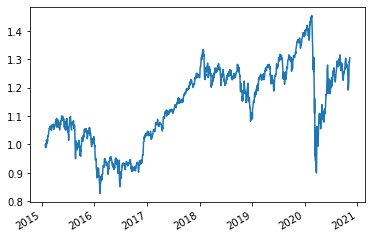

In [425]:
trick_series.plot()

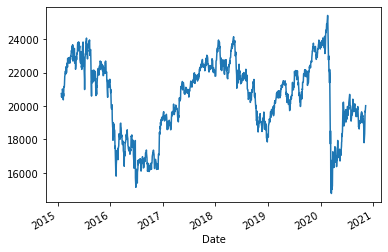

In [426]:
close_df.fib.plot()

## c)

In [427]:
from statsmodels.tsa.stattools import adfuller
X = trick_series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.852098
p-value: 0.354920
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


C:\Users\Gabriele\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


**2.4** From MFIB futures dollar bars:

> **a)** Compute Bollinger bands of width 5% around a rolling moving average. Count how many times prices cross the bands out (from within the band to outside the bands). 

> **b)** Now sample those bars using CUMSUM filter, where {yt} are returns and h=0.005. How many sample do you get?

> **c)** Compute the rolling standard deviation of the two-sampled series. Which one is least heteroscedastic? What is the reason for these results?

## a)

In [521]:
dollar_bars['rolling_mean'] = dollar_bars.Close.rolling(10).mean()
dollar_bars['rolling_std'] = dollar_bars.Close.rolling(10).std()

dollar_bars['boll_up'] = dollar_bars.rolling_mean +(dollar_bars.rolling_std *2.5)
dollar_bars['boll_down'] = dollar_bars.rolling_mean -(dollar_bars.rolling_std *2.5)

In [522]:
#dollar_bars.dropna(inplace=True)
dollar_bars['up_cross'] = np.where((dollar_bars.Close > dollar_bars.boll_up) & 
                                  (dollar_bars.Close.shift(1)<dollar_bars.boll_up),1,0)
dollar_bars['down_cross'] = np.where((dollar_bars.Close < dollar_bars.boll_down) & 
                                  (dollar_bars.Close.shift(1)>dollar_bars.boll_down),1,0)

In [523]:
dollar_bars.up_cross.sum() + dollar_bars.down_cross.sum()

9

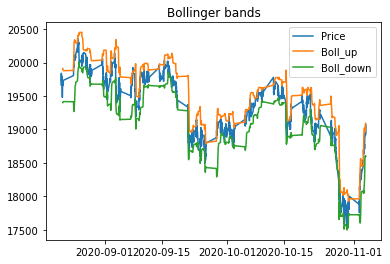

In [445]:
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(dollar_bars['Close'], label='Price')  # Plot some data on the axes.
ax.plot(dollar_bars['boll_up'], label='Boll_up')  # Plot more data on the axes...
ax.plot(dollar_bars['boll_down'], label='Boll_down') 
ax.set_title("Bollinger bands")  # Add a title to the axes.
ax.legend()  # Add a legend.

## b)

In [474]:
dollar_bars['difference'] = dollar_bars.Close.diff()

In [475]:
dollar_bars.head()

,DataTime,Open,Close,High,Low,Volume,rolling_mean,rolling_std,boll_up,boll_down,up_cross,down_cross,diff,difference
DataTime,,,,,,,,,,,,,,
2020-08-21 08:45:42,2020-08-21 08:45:42,19860,19810,19860,19785,142,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2020-08-21 09:01:02,2020-08-21 09:01:02,19810,19840,19845,19795,143,NaN,NaN,NaN,NaN,0,0,30.0,30.0
2020-08-21 09:05:19,2020-08-21 09:05:19,19840,19830,19850,19810,141,NaN,NaN,NaN,NaN,0,0,-10.0,-10.0
2020-08-21 09:10:51,2020-08-21 09:10:51,19835,19775,19855,19775,145,NaN,NaN,NaN,NaN,0,0,-55.0,-55.0
2020-08-21 09:15:15,2020-08-21 09:15:15,19775,19765,19800,19760,141,NaN,NaN,NaN,NaN,0,0,-10.0,-10.0


In [487]:
dollar_bars['Events_up'] = np.where((dollar_bars.difference>0) & 
                                    (dollar_bars.difference > dollar_bars.Close.shift(1)*0.005),1,0)
dollar_bars['Events_down'] = np.where((dollar_bars.difference<0) & 
                                      (dollar_bars.difference < dollar_bars.Close.shift(1)*-0.005),1,0)

In [489]:
dollar_bars.Events_down.sum()

18

In [492]:
dollar_bars['Returns']=dollar_bars.Close.pct_change()

In [514]:
dollar_bars['Events_up'] = np.where((dollar_bars.Returns>0) & 
                                    (dollar_bars.Returns > 0.005),1,0)
dollar_bars['Events_down'] = np.where((dollar_bars.Returns<0) & 
                                      (dollar_bars.Returns<-0.005),1,0)

In [515]:
dollar_bars.Events_down.sum()

18

In [536]:
def getTEvents(gRaw,h):
    tEvents,sPos,sNeg= [],0,0
    rets = gRaw.pct_change()
    for i in rets.index[1:]:
        sPos,sNeg = max(0,sPos+rets.loc[i]),min(0,sNeg+rets.loc[i])
        if sNeg<-h:
            sNeg=0;tEvents.append(i)
        elif sPos>h:
            sPos=0;tEvents.append(i)
    return pd.DatetimeIndex(tEvents)

In [537]:
getTEvents(dollar_bars.Close,0.05)

DatetimeIndex(['2020-09-04 16:36:01', '2020-09-21 09:52:51',
               '2020-10-06 15:02:36', '2020-10-27 09:37:38',
               '2020-10-28 13:41:50', '2020-11-03 08:13:36'],
              dtype='datetime64[ns]', freq=None)

In [517]:
dollar_bars.Events_down[dollar_bars.Events_down==1]

DataTime
2020-09-03 19:03:47    1
2020-09-11 09:37:57    1
2020-09-17 08:11:22    1
2020-09-18 08:55:57    1
2020-09-21 08:02:36    1
2020-09-24 21:07:58    1
2020-09-30 08:00:53    1
2020-10-02 08:05:09    1
2020-10-06 20:52:18    1
2020-10-06 21:06:34    1
2020-10-12 08:20:31    1
2020-10-22 09:21:28    1
2020-10-26 08:00:06    1
2020-10-28 08:01:14    1
2020-10-28 08:11:43    1
2020-10-28 20:58:54    1
2020-10-30 08:01:14    1
2020-11-02 08:01:13    1
Name: Events_down, dtype: int32

In [526]:
dollar_bars.down_cross[dollar_bars.down_cross==1]

DataTime
2020-09-17 08:11:22    1
2020-10-02 08:05:09    1
2020-10-26 08:00:06    1
2020-10-28 08:01:14    1
2020-10-30 08:01:14    1
Name: down_cross, dtype: int32

In [538]:
# per assemblare le barre in base alla regola di CUMSUM creo una colonna in cui faccio la somma cumulativa
# degli 1 e 0 e po uso groupby() e inserisco quest'ultima colonna creata